In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Підготовка даних

In [2]:
data = pd.read_csv('winemag-data_first150k.csv')

In [3]:
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [4]:
data.shape

(150930, 11)

In [5]:
data_geo=pd.read_csv('wine_with_geolocation.csv')

In [6]:
data_geo.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,latitude,longitude
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,38.297137,-122.285529
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,41.521696,-5.393982
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,38.799624,-121.718297
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,45.411007,-122.660652
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,43.135772,5.752365


In [7]:
data=data.drop('Unnamed: 0',axis=1) #Видалили 1-ий ствпець

In [8]:
data_geo.shape


(137230, 12)

In [9]:
data.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [10]:
data.dropna(subset=['price'],inplace=True) # Видалили NaN в стовпці price

In [11]:
data.dropna(subset=['province'],inplace=True) # Видалили NaN в стовпці priceprovince

In [12]:
data.to_csv("winemag_clearn.csv",index=0)

In [13]:
data.isnull().any() # Подивилися, в яких стовпцях є пропуски

country        False
description    False
designation     True
points         False
price          False
province       False
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [14]:
data["designation"].isnull().sum() # Сума пропусків в dessgnation

42311

In [15]:
round(float(data.designation.isnull().sum())/len(data),3)

0.308

In [16]:
data.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'US-France'], dtype=object)

In [17]:
len(data.country.unique())

46

In [18]:
len(data.variety.unique())

619

In [19]:
country_freq = data.country.value_counts(1)[data.country.value_counts(1)>0.01]

In [20]:
len(country_freq)

12

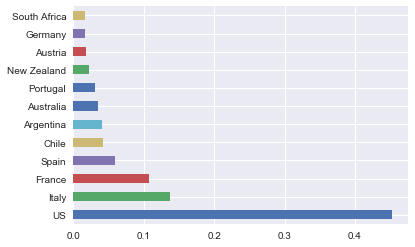

In [21]:
country_freq.plot.barh() #Будуємо гістограму для country, відносн>0.01

In [23]:
sns.barplot(x='country',y='points',data=country_freq)

ValueError: Could not interpret input 'country'

In [18]:
data.province.value_counts(1)

California                                0.323224
Washington                                0.070568
Tuscany                                   0.043438
Northern Spain                            0.035145
Mendoza Province                          0.034293
Oregon                                    0.033309
Burgundy                                  0.024353
Veneto                                    0.022612
South Australia                           0.021533
Piedmont                                  0.021198
Bordeaux                                  0.019369
New York                                  0.017598
Sicily & Sardinia                         0.014807
Northeastern Italy                        0.013496
Marlborough                               0.011623
Loire Valley                              0.010136
Alsace                                    0.009903
Catalonia                                 0.009699
Southwest France                          0.009604
Central Italy                  

In [13]:
province_freq = data.province.value_counts(1)[data.province.value_counts(1)>0.01] 

In [14]:
len(province_freq)

16

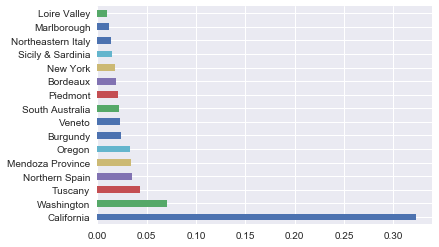

In [15]:
province_freq.plot.barh() #Будуємо гістограму для province, відносна частота появи яких >0.01

In [22]:
data.points.value_counts(1)

87     0.138636
88     0.116840
90     0.104948
86     0.104576
85     0.084559
89     0.084216
84     0.073745
91     0.067121
92     0.059163
83     0.042316
93     0.037871
82     0.028660
94     0.021912
81     0.010683
95     0.010683
80     0.006434
96     0.004132
97     0.002208
98     0.000831
99     0.000291
100    0.000175
Name: points, dtype: float64

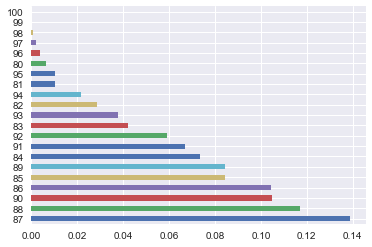

In [23]:
 data.points.value_counts(1).plot.barh()

In [16]:
price_freq = data.price.value_counts(1)[data.price.value_counts(1)>0.02]

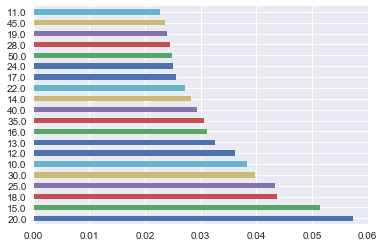

In [17]:
price_freq.plot.barh() #Будуємо гістограму для pricee, відносна частота появи яких >0.02

In [26]:
data.region_2.isnull().sum()

76526

In [27]:
round(float(data.region_2.isnull().sum())/len(data),3)

0.558

In [28]:
round(np.corrcoef(data.price, data.points)[0, 1],2)

0.46

In [36]:
data.winery.value_counts(1)

Williams Selyem                0.002703
Testarossa                     0.001997
DFJ Vinhos                     0.001814
Chateau Ste. Michelle          0.001640
Kendall-Jackson                0.001574
Columbia Crest                 0.001574
Concha y Toro                  0.001559
Trapiche                       0.001465
Bouchard Père & Fils           0.001399
De Loach                       0.001377
Joseph Drouhin                 0.001348
Kenwood                        0.001334
Cameron Hughes                 0.001253
Morgan                         0.001115
D'Arenberg                     0.001115
Dry Creek Vineyard             0.001115
Louis Latour                   0.001115
Robert Mondavi                 0.001100
Concannon                      0.001100
Martin Ray                     0.001086
Errazuriz                      0.001078
Wines & Winemakers             0.001078
L'Ecole No. 41                 0.001049
Montes                         0.001035
Iron Horse                     0.001035


In [37]:
len(data.winery.value_counts(1))

13851

In [54]:
winery_freq = data.winery.value_counts(1)[data.winery.value_counts(1)>0.0012]

Text(0.5,1,u'The winery that made the wine, value_counts>0.0012$')

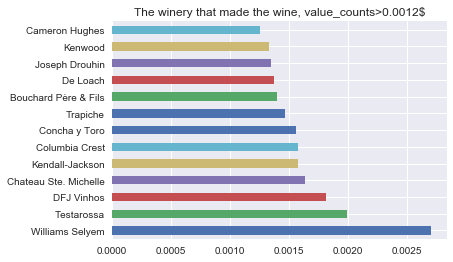

In [55]:
winery_freq.plot.barh()
plt.title("The winery that made the wine, value_counts>0.0012$")

In [49]:
len(winery_freq)

32

In [18]:
province_france_500=data[(data.price>500) & (data.country=='France')].province

Text(0.5,1,u'Distribution in the provinces of France, where wine is made> 500 $')

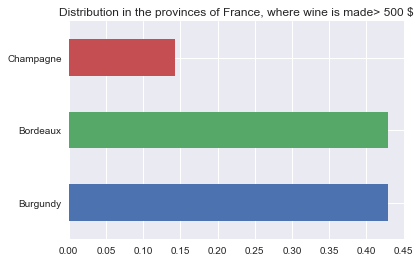

In [19]:
province_france_500.value_counts(1).plot.barh() # Розподіл по провінціях Франції, де виготовляють вина >500$
plt.title("Distribution in the provinces of France, where wine is made> 500 $")

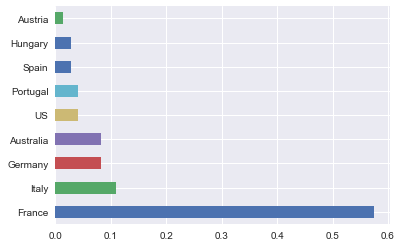

In [39]:
data.country[data.price>500].value_counts(1).plot.barh()

In [21]:
country_20_100=data[(data.price<=100) & (data.price>=20)].country 

In [22]:
country_20_100.value_counts(1)

US                0.538568
Italy             0.142536
France            0.105115
Spain             0.038061
Australia         0.030128
Portugal          0.020347
Austria           0.020286
New Zealand       0.019876
Chile             0.019477
Argentina         0.019441
Germany           0.017896
South Africa      0.010783
Israel            0.005023
Greece            0.004697
Hungary           0.001715
Canada            0.001703
Slovenia          0.000737
Mexico            0.000604
Uruguay           0.000495
Croatia           0.000471
Lebanon           0.000302
Turkey            0.000278
Romania           0.000266
Moldova           0.000205
Georgia           0.000157
Brazil            0.000121
Serbia            0.000121
Luxembourg        0.000109
England           0.000097
Bulgaria          0.000085
Cyprus            0.000060
Macedonia         0.000036
Switzerland       0.000036
Morocco           0.000036
Czech Republic    0.000024
China             0.000024
Albania           0.000024
J

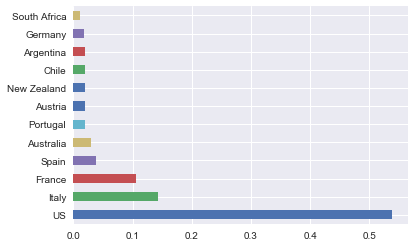

In [23]:
country_20_100.value_counts(1)[country_20_100.value_counts(1)>0.01].plot.barh() 
# Розподіл по країнах, де купують вина 20<wine<100$

In [21]:
# Застосували цілочисельне кодування до змінної country
country_20_100 = country_20_100.map({'US': 0, 'Italy': 1,'France':2,'Spain':3,'Australia':4})

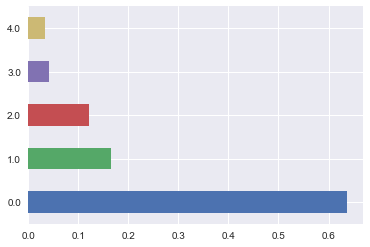

In [22]:
country_20_100.value_counts(1).plot.barh()

In [196]:
province_20_100=data[(data.price>=20) & (data.price<=100) & 
                     ((data.country=="France")|(data.country=="US") | (data.country=="Italy"))].province

In [197]:
province_20_100.value_counts(1)[province_20_100.value_counts(1)>0.01]

California            0.391311
Washington            0.084370
Tuscany               0.051573
Oregon                0.042626
Burgundy              0.029548
Northern Spain        0.024380
Piedmont              0.024151
Veneto                0.021023
South Australia       0.020637
Bordeaux              0.017014
Mendoza Province      0.016797
Sicily & Sardinia     0.013017
New York              0.012582
Northeastern Italy    0.012413
Alsace                0.011459
Loire Valley          0.010711
Champagne             0.010336
Name: province, dtype: float64

Text(0.5,1,u'Distribution in the provinces of France, where wine is made 20<Buttle<100 $')

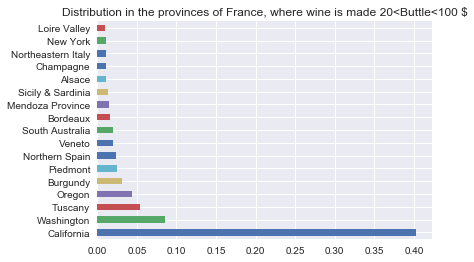

In [173]:
province_20_100.value_counts(1)[province_20_100.value_counts(1)>0.01].plot.barh()
plt.title("Distribution in the provinces of France, where wine is made 20<Buttle<100 $")

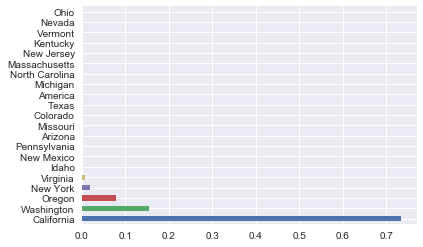

In [159]:
province_20_100.value_counts(1).plot.barh()

In [100]:
province_500=data[data.price>500].province

In [105]:
province_500.value_counts(1)

Bordeaux           0.246575
Burgundy           0.246575
South Australia    0.082192
Champagne          0.082192
Rheingau           0.082192
Veneto             0.054795
Tuscany            0.054795
Port               0.041096
California         0.041096
Tokaji             0.027397
Catalonia          0.013699
Wachau             0.013699
Northern Spain     0.013699
Name: province, dtype: float64

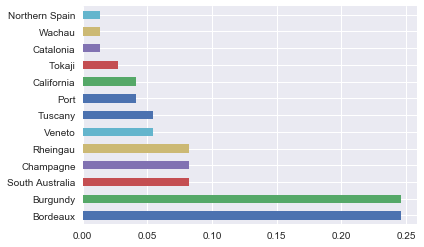

In [107]:
province_500.value_counts(1).plot.barh() #Де виготовляють найдорожчі вина

In [193]:
points_20_100=data[(data.price>19) & (data.price<101) & ((data.country=="France") 
                                                         | (data.country=="US") | (data.country=="Italy"))].points

Text(0.5,1,u'Distribution of points for wines 20<buttle<100')

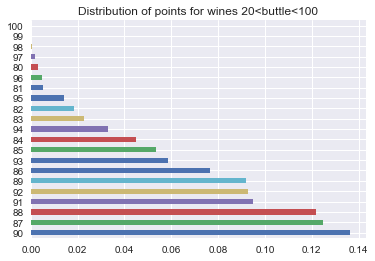

In [194]:
points_20_100.value_counts(1).plot.barh()
plt.title("Distribution of points for wines 20<buttle<100")

Text(0.5,1,u'Points for price')

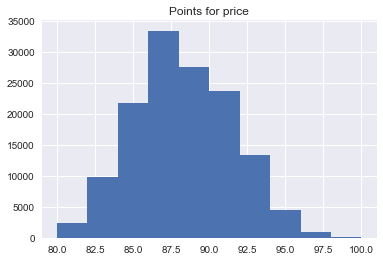

In [28]:
plt.hist(data.points)
plt.title("Points for price")

In [ ]:
from sklearn import linear_model

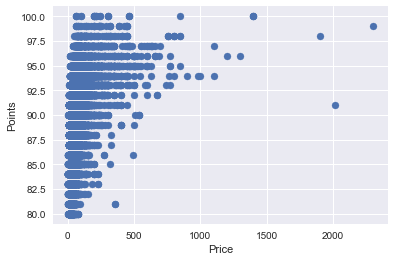

In [35]:
plt.scatter(data.price, data.points)
plt.xlabel("Price")
plt.ylabel("Points")
plt.show()

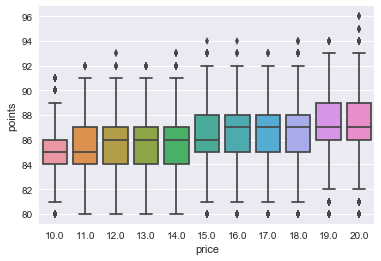

In [55]:
sns.boxplot(data.price[(data.price>=10) & (data.price<=20)], data.points, data=data);

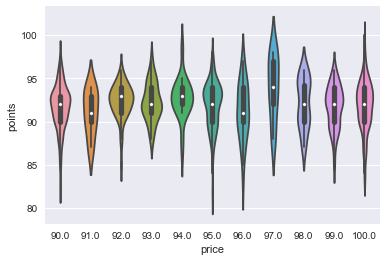

In [62]:
sns.violinplot(data.price[(data.price>=90) & (data.price<=100)], data.points,  data=data);

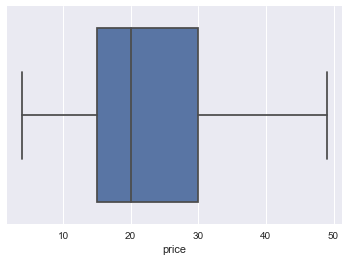

In [66]:
 sns.boxplot(x=data["price"][data.price<50])

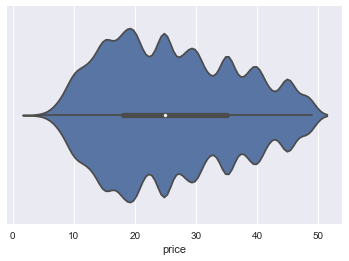

In [107]:
 ax = sns.violinplot(x=data.price[(data.price<50) & (data.country=="US")])

In [94]:
data.price[data.price>500].describe()

count      73.000000
mean      778.575342
std       347.420291
min       505.000000
25%       588.000000
50%       660.000000
75%       800.000000
max      2300.000000
Name: price, dtype: float64

In [105]:
data.points[(data.price<=50) & (data.country=="France")].describe()

count    11278.000000
mean        87.646835
std          2.632535
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max         96.000000
Name: points, dtype: float64

In [113]:
data.points[(data.price<=50) & (data.country=="Italy")].describe()

count    14845.000000
mean        87.669720
std          2.267654
min         80.000000
25%         86.000000
50%         87.000000
75%         89.000000
max         96.000000
Name: points, dtype: float64

In [116]:
data[(data.price<=100)].describe()

,points,price
count,133765.000000,133765.000000
mean,87.655127,29.281015
std,3.120168,18.757512
min,80.000000,4.000000
25%,85.000000,15.000000
50%,87.000000,24.000000
75%,90.000000,38.000000
max,100.000000,100.000000


In [19]:
region1_freq = data.region_1.value_counts(1)[data.region_1.value_counts(1)>0.01]

In [20]:
region1_freq

Napa Valley                0.054120
Columbia Valley (WA)       0.043193
Mendoza                    0.031086
Russian River Valley       0.030920
California                 0.030247
Paso Robles                0.026566
Willamette Valley          0.018227
Rioja                      0.016470
Sonoma County              0.016199
Toscana                    0.014511
Sonoma Coast               0.012877
Carneros                   0.012728
Dry Creek Valley           0.012204
Finger Lakes               0.011933
Sicilia                    0.011924
Santa Barbara County       0.011478
Brunello di Montalcino     0.011408
Alsace                     0.011023
Walla Walla Valley (WA)    0.010551
Yakima Valley              0.010123
Name: region_1, dtype: float64

Text(0.5,1,u'The wine growing area in a province or state, value_counts(1)>0.01 ')

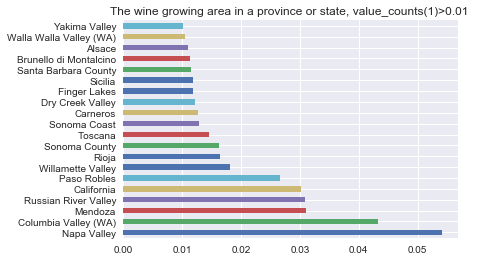

In [22]:
region1_freq.plot.barh()
plt.title("The wine growing area in a province or state, value_counts(1)>0.01 ")